In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
# Load data.
data = pd.read_csv('supermarket_sales.csv')
data.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [14]:
"""
- Clean Data.
- Check null values
- Convert categorical values into numerical format
"""

data.isnull().count()

# data.fillna(data.mean(), inplace=True)

# data['Payment'] = pd.factorize(data['Payment'][0])

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

In [16]:
data[data['Quantity'] > 2].head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [ ]:
def getDataByBranch(data:pd.DataFrame, branch_name):
    if data:
        return data[data[branch_name]]

getDataByBranch(data, 'A')
data[data['Branch'] == 'A']

Invoice ID Branch    City Customer type  Gender            Product line  \
0    750-67-8428      A  Yangon        Member  Female       Health and beauty   
2    631-41-3108      A  Yangon        Normal    Male      Home and lifestyle   
3    123-19-1176      A  Yangon        Member    Male       Health and beauty   
4    373-73-7910      A  Yangon        Normal    Male       Sports and travel   
6    355-53-5943      A  Yangon        Member  Female  Electronic accessories   
..           ...    ...     ...           ...     ...                     ...   
990  886-18-2897      A  Yangon        Normal  Female      Food and beverages   
992  745-74-0715      A  Yangon        Normal    Male  Electronic accessories   
997  727-02-1313      A  Yangon        Member    Male      Food and beverages   
998  347-56-2442      A  Yangon        Normal    Male      Home and lifestyle   
999  849-09-3807      A  Yangon        Member  Female     Fashion accessories   

     Unit price  Quantity   Tax 5%     Total       Date   Time      Payment  \
0         74.69         7  26.1415  548.9715   1/5/2019  13:08      Ewallet   
2         46.33         7  16.2155  340.5255   3/3/2019  13:23  Credit card   
3         58.22         8  23.2880  489.0480  1/27/2019  20:33      Ewallet   
4         86.31         7  30.2085  634.3785   2/8/2019  10:37      Ewallet   
6         68.84         6  20.6520  433.6920  2/25/2019  14:36      Ewallet   
..          ...       ...      ...       ...        ...    ...          ...   
990       56.56         5  14.1400  296.9400  3/22/2019  19:06  Credit card   
992       58.03         2   5.8030  121.8630  3/10/2019  20:46      Ewallet   
997       31.84         1   1.5920   33.4320   2/9/2019  13:22         Cash   
998       65.82         1   3.2910   69.1110  2/22/2019  15:33         Cash   
999       88.34         7  30.9190  649.2990  2/18/2019  13:28         Cash   

       cogs  gross margin percentage  gross income  Rating  
0    522.83                 4.761905       26.1415     9.1  
2    324.31                 4.761905       16.2155     7.4  
3    465.76                 4.761905       23.2880     8.4  
4    604.17                 4.761905       30.2085     5.3  
6    413.04                 4.761905       20.6520     5.8  
..      ...                      ...           ...     ...  
990  282.80                 4.761905       14.1400     4.5  
992  116.06                 4.761905        5.8030     8.8  
997   31.84                 4.761905        1.5920     7.7  
998   65.82                 4.761905        3.2910     4.1  
999  618.38                 4.761905       30.9190     6.6  

[340 rows x 17 columns]

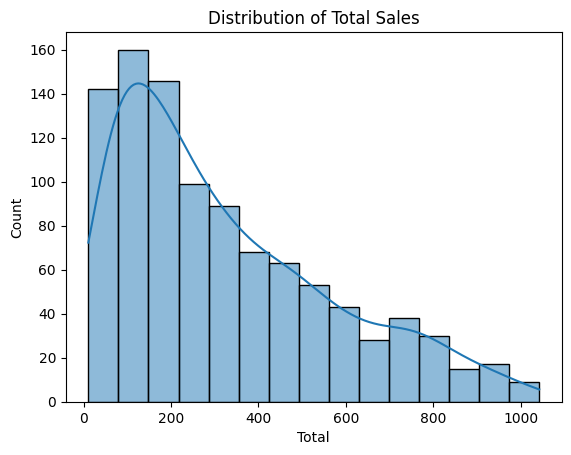

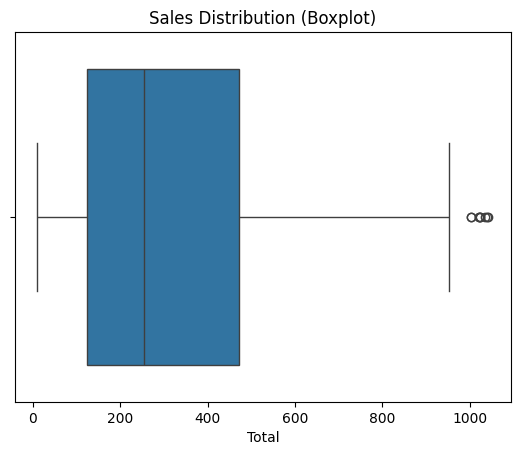

In [21]:
# Histogram for total sales distribution
sns.histplot(data['Total'], kde=True)  # KDE adds a smoothed line
plt.title('Distribution of Total Sales')
plt.show()

# Boxplot to check sales distribution and outliers
sns.boxplot(x=data['Total'])
plt.title('Sales Distribution (Boxplot)')
plt.show()


In [29]:
# Calculating average/MEAN.

avg = sum(data['Total']) / len(data['Total'])

avg = data['Total'].mean()

avg


322.966749

In [30]:
# Cleaning data - In progress